In [1]:
import requests
import re
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
xlsx = pd.ExcelFile('TJ_list.xlsx')
tj_players = pd.read_excel(xlsx, 'TJ List')

In [8]:
tj_players.head()

,Player,TJ Surgery Date,Team,Level,Position,Throws,Country,High School,College(s),Age,...,IP,K-BB%,ERA-,FIP-,G.1,GS.1,IP.1,K-BB%.1,ERA-.1,FIP-.1
0,Colin Rea,2016-11-10,SD,MLB,P,R,United States,Iowa,Indiana State,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bryan Harper,2016-11-08,WAS,AAA,P,L,United States,Nevada,"Southern Nevada, South Carolina",26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yimi Garcia,2016-10-25,LAD,AA,P,R,Dominican,NaN,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ryan Cook,2016-10-20,SEA,Rk,P,R,United States,California,USC,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J.B. Wendelken,2016-10-12,OAK,MLB,P,R,United States,Georgia,Middle Georgia,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tj_players.columns

Index([u'Player', u'TJ Surgery Date', u'Team', u'Level', u'Position',
       u'Throws', u'Country', u'High School', u'College(s)', u'Age',
       u'Return Date (same level)', u'Recovery Time (months)', u'mlbamid',
       u'fgid', u'Surgeon(s)', u'Post-TJ MLB G', u'Post-TJ MLB IP/PA',
       u'Active', u'Year', u'Month', u'Started\nThrowing', u'Mound',
       u'Bullpen', u'Live\nHitters', u'Game', u'Setback', u'Setback Type',
       u'Setback.1', u'Setback Type.1', u'G', u'GS', u'IP', u'K-BB%', u'ERA-',
       u'FIP-', u'G.1', u'GS.1', u'IP.1', u'K-BB%.1', u'ERA-.1', u'FIP-.1'],
      dtype='object')

In [5]:
tj_players.isnull().sum()

Player                         0
TJ Surgery Date                0
Team                           0
Level                          0
Position                       0
Throws                         0
Country                        0
High School                  289
College(s)                   569
Age                            0
Return Date (same level)     295
Recovery Time (months)       723
mlbamid                       14
fgid                          42
Surgeon(s)                   876
Post-TJ MLB G                  0
Post-TJ MLB IP/PA              0
Active                         0
Year                           0
Month                          0
Started\nThrowing           1321
Mound                       1329
Bullpen                     1325
Live\nHitters               1324
Game                        1311
Setback                     1317
Setback Type                1317
Setback.1                   1330
Setback Type.1              1330
G                           1276
GS        

In [9]:
del tj_players['High School']
del tj_players['College(s)']
del tj_players['Return Date (same level)']
del tj_players['Recovery Time (months)']
del tj_players['mlbamid']
del tj_players['Surgeon(s)']
del tj_players['Started\nThrowing']
del tj_players['Mound']
del tj_players['Bullpen']
del tj_players['Live\nHitters']
del tj_players['Game']
del tj_players['Setback']
del tj_players['Setback Type']
del tj_players['Setback.1']
del tj_players['Setback Type.1']
del tj_players['G']
del tj_players['GS']
del tj_players['IP']
del tj_players['K-BB%']
del tj_players['ERA-']
del tj_players['FIP-']
del tj_players['G.1']
del tj_players['GS.1']
del tj_players['IP.1']
del tj_players['K-BB%.1']
del tj_players['ERA-.1']
del tj_players['FIP-.1']


In [10]:
tj_players.head()

,Player,TJ Surgery Date,Team,Level,Position,Throws,Country,Age,fgid,Post-TJ MLB G,Post-TJ MLB IP/PA,Active,Year,Month
0,Colin Rea,2016-11-10,SD,MLB,P,R,United States,25,12317,0,0.0,1,2016,11
1,Bryan Harper,2016-11-08,WAS,AAA,P,L,United States,26,sa549768,0,0.0,1,2016,11
2,Yimi Garcia,2016-10-25,LAD,AA,P,R,Dominican,25,12095,0,0.0,1,2016,10
3,Ryan Cook,2016-10-20,SEA,Rk,P,R,United States,29,8855,0,0.0,1,2016,10
4,J.B. Wendelken,2016-10-12,OAK,MLB,P,R,United States,23,14506,0,0.0,1,2016,10


In [11]:
tj_players.isnull().sum()

Player                0
TJ Surgery Date       0
Team                  0
Level                 0
Position              0
Throws                0
Country               0
Age                   0
fgid                 42
Post-TJ MLB G         0
Post-TJ MLB IP/PA     0
Active                0
Year                  0
Month                 0
dtype: int64

In [12]:
tj_players['tjs'] = 1

In [13]:
tj_players.columns = [i.replace(' ','_').lower() for i in tj_players.columns]

In [14]:
tj_players['player']=tj_players['player'].apply(lambda x: x.replace(' ','_').lower())

In [15]:
tj_players.head()

,player,tj_surgery_date,team,level,position,throws,country,age,fgid,post-tj_mlb_g,post-tj_mlb_ip/pa,active,year,month,tjs
0,colin_rea,2016-11-10,SD,MLB,P,R,United States,25,12317,0,0.0,1,2016,11,1
1,bryan_harper,2016-11-08,WAS,AAA,P,L,United States,26,sa549768,0,0.0,1,2016,11,1
2,yimi_garcia,2016-10-25,LAD,AA,P,R,Dominican,25,12095,0,0.0,1,2016,10,1
3,ryan_cook,2016-10-20,SEA,Rk,P,R,United States,29,8855,0,0.0,1,2016,10,1
4,j.b._wendelken,2016-10-12,OAK,MLB,P,R,United States,23,14506,0,0.0,1,2016,10,1


In [16]:
tj_players['player']=tj_players['player'].apply(lambda x: x.replace('.',''))

In [17]:
tj_players.head()

,player,tj_surgery_date,team,level,position,throws,country,age,fgid,post-tj_mlb_g,post-tj_mlb_ip/pa,active,year,month,tjs
0,colin_rea,2016-11-10,SD,MLB,P,R,United States,25,12317,0,0.0,1,2016,11,1
1,bryan_harper,2016-11-08,WAS,AAA,P,L,United States,26,sa549768,0,0.0,1,2016,11,1
2,yimi_garcia,2016-10-25,LAD,AA,P,R,Dominican,25,12095,0,0.0,1,2016,10,1
3,ryan_cook,2016-10-20,SEA,Rk,P,R,United States,29,8855,0,0.0,1,2016,10,1
4,jb_wendelken,2016-10-12,OAK,MLB,P,R,United States,23,14506,0,0.0,1,2016,10,1


In [21]:
tj_players.to_csv('tj_list.csv', encoding ='utf-8')

In [ ]:
fg_info1 = pd.read_csv('../Data/p_st_2014.csv')
fg_info2 = pd.read_csv('../Data/p_adv_2014.csv')
fg_info3 = pd.read_csv('../Data/p_bb_2014.csv')
fg_info4 = pd.read_csv('../Data/p_hmov_2014.csv')
fg_info5 = pd.read_csv('../Data/p_vmov_2014.csv')
fg_info6 = pd.read_csv('../Data/p_fx_pd_2014.csv')
fg_info7 = pd.read_csv('../Data/p_fx_velo_2014.csv')
fg_info8 = pd.read_csv('../Data/p_fx_ty_2014.csv')
fg_info9 = pd.read_csv('../Data/p_ty_2014.csv')
fg_info10 = pd.read_csv('../Data/p_pval_2014.csv')
fg_info11 = pd.read_csv('../Data/p_pd_2014.csv')

In [179]:
fg_info2.shape

(545, 22)

In [180]:
merge1 = fg_info1.merge(fg_info2,on='playerid')
merge2 = merge1.merge(fg_info3,on='playerid')
merge3 = merge2.merge(fg_info4,on='playerid')
merge4 = merge3.merge(fg_info5,on='playerid')
merge5 = merge4.merge(fg_info6,on='playerid')
merge6 = merge5.merge(fg_info7,on='playerid')
merge7 = merge6.merge(fg_info8,on='playerid')
merge8 = merge7.merge(fg_info9,on='playerid')
merge9 = merge8.merge(fg_info10,on='playerid')
pitchers_2014 = merge9.merge(fg_info11,on='playerid')

In [181]:
pitchers_2014.shape

(545, 186)

In [182]:
pitchers_2014.to_csv('pitchers_2014.csv')

In [18]:
tj_dict = {}
for index, row in tj_players.iterrows():
    tj_dict[str(row['fgid'])] = {'year':int(row['year']),
                           'month':int(row['month']),
                           'age': int(row['age'])
                           }

In [195]:
pitchers_2015.head()

,"﻿""Name""_x",Team_x,W,L,ERA_x,G,GS,CG,ShO,SV,HLD,BS,IP_x,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,playerid,"﻿""Name""_y",Team_y,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,AVG,WHIP,BABIP_x,LOB%,ERA-,FIP-,xFIP-,ERA_y,FIP,E-F,xFIP,SIERA,"﻿""Name""_x",Team_x,BABIP_y,GB/FB,LD%,GB%,FB%_x,IFFB%,HR/FB,RS,RS/9,Balls,Strikes,Pitches,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,"﻿""Name""_y",Team_y,IP_y,FA-X,FT-X,FC-X,FS-X,FO-X,SI-X,SL-X,CU-X,KC-X,EP-X,CH-X,SC-X,KN-X,"﻿""Name""_x",Team_x,IP_x,FA-Z,FT-Z,FC-Z,FS-Z,FO-Z,SI-Z,SL-Z,CU-Z,KC-Z,EP-Z,CH-Z,SC-Z,KN-Z,"﻿""Name""_y",Team_y,IP_y,O-Swing%_x,Z-Swing%_x,Swing%_x,O-Contact%_x,Z-Contact%_x,Contact%_x,Zone%_x,Pace,"﻿""Name""_x",Team_x,IP_x,vFA,vFT,vFC,vFS,vFO,vSI,vSL,vCU,vKC,vEP,vCH,vSC,vKN,"﻿""Name""_y",Team_y,IP_y,FA%,FT%,FC%,FS%,FO%,SI%,SL%_x,CU%,KC%,EP%,CH%_x,SC%,KN%_x,UN%,"﻿""Name""_x",Team_x,FB%_y,FBv,SL%_y,SLv,CT%,CTv,CB%,CBv,CH%_y,CHv,SF%,SFv,KN%_y,KNv,XX%,"﻿""Name""_y",Team_y,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,"﻿""Name""",Team,O-Swing%_y,Z-Swing%_y,Swing%_y,O-Contact%_y,Z-Contact%_y,Contact%_y,Zone%_y,F-Strike%,SwStr%
0,Adam Ottavino,Rockies,1,0,0.00,10,0,0,0,3,3,0,10.1,35,3,0,0,0,2,0,1,0,0,13,1247,Adam Ottavino,Rockies,11.32,1.74,6.50,0.00,37.1 %,5.7 %,31.4 %,0.094,0.48,0.158,100.0 %,0,36,61,0.00,1.49,-1.49,2.35,1.62,Adam Ottavino,Rockies,0.158,2.00,5.3 %,63.2 %,31.6 %,33.3 %,0.0 %,1,0.87,52,90,142,36.8 %,31.6 %,31.6 %,26.3 %,57.9 %,15.8 %,Adam Ottavino,Rockies,10.1,-5.4,-9.1,1.2,NaN,NaN,NaN,5.9,NaN,NaN,NaN,NaN,NaN,NaN,Adam Ottavino,Rockies,10.1,6.1,3.6,0.5,NaN,NaN,NaN,-1.4,NaN,NaN,NaN,NaN,NaN,NaN,Adam Ottavino,Rockies,10.1,36.4 %,47.7 %,41.6 %,53.6 %,83.9 %,69.5 %,45.8 %,23.8,Adam Ottavino,Rockies,10.1,94.9,95.2,88.8,NaN,NaN,NaN,83.8,NaN,NaN,NaN,NaN,NaN,NaN,Adam Ottavino,Rockies,10.1,38.0 %,17.6 %,3.5 %,NaN,NaN,NaN,40.9 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adam Ottavino,Rockies,48.6 %,95.7,39.4 %,83.7,12.0 %,89.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adam Ottavino,Rockies,3.3,2.2,-0.4,NaN,NaN,NaN,NaN,4.85,3.90,-2.30,NaN,NaN,NaN,NaN,Adam Ottavino,Rockies,35.1 %,49.2 %,41.6 %,51.9 %,84.4 %,69.5 %,45.8 %,51.4 %,12.7 %
1,Dalier Hinojosa,- - -,2,0,0.73,19,0,0,0,0,3,1,24.2,102,15,3,2,1,11,1,1,1,0,23,15671,Dalier Hinojosa,- - -,8.39,4.01,2.09,0.36,22.6 %,10.8 %,11.8 %,0.167,1.05,0.212,93.8 %,19,82,111,0.73,3.26,-2.53,4.34,3.86,Dalier Hinojosa,- - -,0.212,1.15,13.4 %,46.3 %,40.3 %,7.4 %,3.7 %,17,6.20,159,270,429,34.3 %,28.4 %,37.3 %,10.5 %,67.2 %,22.4 %,Dalier Hinojosa,- - -,24.2,-1.2,-4.9,0.4,NaN,NaN,NaN,2.0,NaN,NaN,NaN,-5.6,NaN,NaN,Dalier Hinojosa,- - -,24.2,11.4,10.7,8.5,NaN,NaN,NaN,0.8,NaN,NaN,NaN,6.5,NaN,NaN,Dalier Hinojosa,- - -,24.2,28.7 %,64.8 %,47.1 %,66.7 %,84.3 %,79.0 %,50.8 %,22.5,Dalier Hinojosa,- - -,24.2,92.4,93.2,89.7,NaN,NaN,NaN,85.4,NaN,NaN,NaN,86.2,NaN,NaN,Dalier Hinojosa,- - -,24.2,20.2 %,43.8 %,1.2 %,NaN,NaN,NaN,22.8 %,NaN,NaN,NaN,12.0 %,NaN,NaN,NaN,Dalier Hinojosa,- - -,63.8 %,93.1,23.5 %,85.3,NaN,NaN,NaN,NaN,12.7 %,86.6,NaN,NaN,NaN,NaN,0.9 %,Dalier Hinojosa,- - -,4.0,0.8,NaN,NaN,0.4,NaN,NaN,1.47,0.75,NaN,NaN,0.69,NaN,NaN,Dalier Hinojosa,- - -,24.8 %,72.4 %,47.1 %,67.9 %,84.0 %,79.5 %,46.8 %,54.9 %,9.6 %
2,Jordan Walden,Cardinals,0,1,0.87,12,0,0,0,1,8,0,10.1,42,7,1,1,0,4,1,0,2,0,12,3271,Jordan Walden,Cardinals,10.45,3.48,3.00,0.00,28.6 %,9.5 %,19.1 %,0.184,1.06,0.269,90.9 %,23,52,80,0.87,1.97,-1.10,3.12,3.00,Jordan Walden,Cardinals,0.269,1.38,26.9 %,42.3 %,30.8 %,25.0 %,0.0 %,1,0.87,50,106,156,38.5 %,23.1 %,38.5 %,11.5 %,65.4 %,23.1 %,Jordan Walden,Cardinals,10.1,-8.6,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,-10.7,NaN,NaN,Jordan Walden,Cardinals,10.1,9.5,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN,5.0,NaN,NaN,Jordan Walden,Cardinals,10.1,46.2 %,66.7 %,54.6 %,45.2 %,78.6 %,61.9 %,40.9 %,23.1,Jordan Walden,Cardinals,10.1,94.4,NaN,NaN,NaN,NaN,NaN,83.9,NaN,NaN,NaN,85.9,NaN,NaN,Jordan Walden,Cardinals,10.1,52.0 %,NaN,NaN,NaN,NaN,NaN,27.3 %,NaN,NaN,NaN,20.8 %,NaN,NaN,NaN,Jordan Walden,Cardinals,54.6 %,94.2,27.3 %,84.0,NaN,NaN,NaN,NaN,18.2 %,85.1,NaN,NaN,NaN,NaN,1.3 %,Jordan Walden,Car

In [4]:
pitchers_2015['playerid'] = pitchers_2015['playerid'].apply(lambda x: str(x))

In [19]:
for index, row in pitchers_2015.iterrows():
    if str(row['playerid']) in tj_dict and tj_dict[row['playerid']]['year'] == 2016:
        pitchers_2015.loc[index, 'tj'] = 1
    else:
        pitchers_2015.loc[index, 'tj'] = 0

In [20]:
for index, row in pitchers_2015.iterrows():
    if row['playerid'] in tj_dict:
        pitchers_2015.loc[index, 'prev_tj'] = 1
    else:
        pitchers_2015.loc[index, 'prev_tj'] = 0

In [21]:
tj_players[tj_players['level'] == 'MLB'].year.value_counts()

2012    36
2014    31
2015    27
2007    22
2013    20
2009    20
2006    20
2003    19
2016    19
2011    17
2010    17
2005    17
2000    16
2008    15
2002    15
2001    15
2004    13
1995    10
1999    10
1998     8
1994     6
1993     6
1991     6
1997     5
1996     5
1992     4
1989     4
1986     4
1988     3
1982     3
1990     2
1984     2
1983     1
1978     1
1974     1
Name: year, dtype: int64

In [22]:
pitchers_2015[pitchers_2015['prev_tj'] == 1]

,Unnamed: 0,W,L,G,GS,CG,ShO,SV,HLD,BS,...,Z-Contact%_y,Contact%_y,Zone%_y,F-Strike%,SwStr%,IP,BABIP,ERA,tj,prev_tj
0,0,1,0,10,0,0,0,3,3,0,...,84.4 %,69.5 %,45.8 %,51.4 %,12.7 %,10.1,0.158,0.00,0.0,1.0
3,3,1,0,32,0,0,0,0,3,0,...,87.0 %,77.2 %,42.0 %,61.8 %,10.7 %,39.1,0.192,0.92,0.0,1.0
5,5,1,0,30,0,0,0,0,11,2,...,67.7 %,51.7 %,46.7 %,66.1 %,25.4 %,31.0,0.327,1.16,1.0,1.0
7,7,1,0,32,0,0,0,0,4,1,...,87.5 %,81.3 %,46.1 %,65.3 %,8.3 %,28.0,0.313,1.29,0.0,1.0
12,12,2,1,4,4,1,1,0,0,0,...,74.7 %,75.7 %,52.8 %,61.3 %,11.3 %,29.0,0.197,1.55,0.0,1.0
14,14,3,1,36,0,0,0,9,3,1,...,87.4 %,75.9 %,46.2 %,57.6 %,11.5 %,33.2,0.295,1.60,0.0,1.0
15,15,2,1,7,4,0,0,0,0,0,...,89.6 %,84.4 %,46.2 %,54.1 %,7.8 %,28.0,0.287,1.61,0.0,1.0
19,19,6,4,72,0,0,0,30,8,4,...,88.2 %,77.8 %,44.7 %,63.7 %,10.8 %,70.0,0.268,1.67,0.0,1.0
24,24,4,1,28,0,0,0,0,1,0,...,78.3 %,76.1 %,41.9 %,67.2 %,10.8 %,29.2,0.276,1.82,0.0,1.0
27,27,5,5,68,0,0,0,2,13,4,...,89.7 %,81.0 %,42.7 %,59.8 %,8.4 %,71.0,0.192,1.90,0.0,1.0


In [23]:
pitchers_2015.corr()

,Unnamed: 0,W,L,G,GS,CG,ShO,SV,HLD,BS,...,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,IP,BABIP,ERA,tj,prev_tj
Unnamed: 0,1.000000,-0.266249,0.035242,-0.432746,-0.010256,-0.123623,-0.109322,-0.292085,-0.308384,-0.233752,...,-0.210789,-0.334323,-0.084113,0.116973,-1.0,-0.195918,0.479904,0.928881,-0.039346,-0.022074
W,-0.266249,1.000000,0.665340,0.108509,0.836211,0.556287,0.450971,-0.047414,-0.129677,-0.145111,...,0.051664,0.169058,0.080844,0.109442,1.0,0.902754,-0.146490,-0.276234,-0.093785,-0.049727
L,0.035242,0.665340,1.000000,0.050190,0.824001,0.415705,0.326597,-0.050201,-0.156552,-0.130298,...,-0.052010,0.033494,0.041963,0.122749,1.0,0.834839,0.015548,-0.006734,-0.067803,-0.090267
G,-0.432746,0.108509,0.050190,1.000000,-0.215598,-0.052295,-0.038504,0.418958,0.717801,0.691776,...,0.074197,0.049500,0.060763,-0.006911,1.0,0.121247,-0.167863,-0.416223,-0.067608,-0.041573
GS,-0.010256,0.836211,0.824001,-0.215598,1.000000,0.524844,0.413953,-0.200648,-0.393674,-0.413167,...,-0.006671,0.106011,0.056260,0.122820,1.0,0.930732,-0.023295,-0.048559,-0.060919,-0.065509
CG,-0.123623,0.556287,0.415705,-0.052295,0.524844,1.000000,0.823360,-0.084544,-0.172645,-0.182437,...,0.060990,0.140959,0.050720,0.014090,1.0,0.565793,-0.092539,-0.118451,-0.051711,-0.076189
ShO,-0.109322,0.450971,0.326597,-0.038504,0.413953,0.823360,1.000000,-0.066875,-0.136228,-0.144333,...,0.044777,0.108256,0.025749,0.006119,NaN,0.456138,-0.091530,-0.103758,-0.040911,-0.078592
SV,-0.292085,-0.047414,-0.050201,0.418958,-0.200648,-0.084544,-0.066875,1.000000,0.036067,0.515504,...,0.087203,0.052544,0.056280,0.110262,NaN,-0.048785,-0.108061,-0.253680,-0.030084,0.016847
HLD,-0.308384,-0.129677,-0.156552,0.717801,-0.393674,-0.172645,-0.136228,0.036067,1.000000,0.584913,...,0.075944,-0.073437,0.017428,-0.188144,NaN,-0.173432,-0.144573,-0.286771,0.021752,0.006029
BS,-0.233752,-0.145111,-0.130298,0.691776,-0.413167,-0.182437,-0.144333,0.515504,0.584913,1.000000,...,0.073471,0.009735,-0.012988,-0.113193,NaN,-0.184485,-0.055214,-0.216416,-0.000812,0.005863


In [24]:
for n in range(0,len(pitchers_2015.corr()['tj'])):
    if pitchers_2015.corr()['tj'][n] > 0.05:
        print pitchers_2015.corr()['tj'][n:n+1]

FC-X    0.075619
Name: tj, dtype: float64
FS-X    0.147037
Name: tj, dtype: float64
SI-X    0.075927
Name: tj, dtype: float64
KC-X    0.05
Name: tj, dtype: float64
FS-Z    0.081852
Name: tj, dtype: float64
KC-Z    0.245546
Name: tj, dtype: float64
vSI    0.068674
Name: tj, dtype: float64
vKC    0.175374
Name: tj, dtype: float64
wFB/C    0.056152
Name: tj, dtype: float64
tj    1.0
Name: tj, dtype: float64
prev_tj    0.274999
Name: tj, dtype: float64


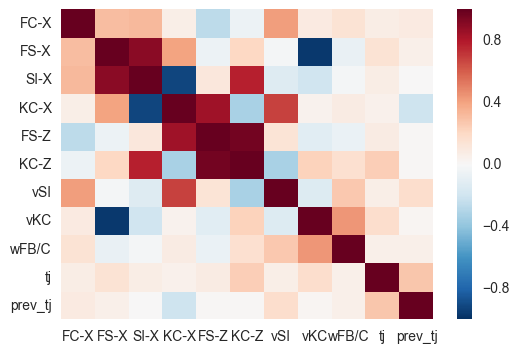

In [25]:
sns.heatmap(pitchers_2015[['FC-X','FS-X','SI-X','KC-X','FS-Z','KC-Z','vSI','vKC','wFB/C','tj','prev_tj']].corr())

In [253]:
pitchers_2014.isnull().sum()

W                 0
L                 0
G                 0
GS                0
CG                0
ShO               0
SV                0
HLD               0
BS                0
TBF               0
H                 0
R                 0
ER                0
HR                0
BB                0
IBB               0
HBP               0
WP                0
BK                0
SO                0
playerid          0
K/9               0
BB/9              0
K/BB              0
HR/9              0
K%                0
BB%               0
K-BB%             0
AVG               0
WHIP              0
LOB%              0
ERA-              0
FIP-              0
xFIP-             0
FIP               0
E-F               0
xFIP              0
SIERA             0
GB/FB             0
LD%               0
GB%               0
FB%_x             0
IFFB%             0
HR/FB             0
RS                0
RS/9              0
Balls             0
Strikes           0
Pitches           0
Pull%             0


In [236]:

for index, row in pitchers_2014.iterrows():
    pitchers_2014.loc[index,'IP'] = np.mean(pitchers_2014.loc[index,'IP_x'])

In [237]:
pitchers_2014['BABIP'] = pitchers_2014['BABIP_x'] 

In [238]:
pitchers_2014['ERA'] = pitchers_2014['ERA_x'] 

In [252]:
del pitchers_2014['ERA_y']

In [254]:
pitchers_2014.to_csv('pitchers_2014.csv')

In [255]:
pitchers_2015.shape

(598, 159)

In [256]:
pitchers_2014.shape

(545, 159)

In [29]:
pitchers_2014 = pd.read_csv('pitchers_2014.csv')

In [3]:
pitchers_2015 = pd.read_csv('pitchers_2015.csv')

In [2]:
pitchers_2014_15_avg = pd.read_csv('pitchers_2015.csv')

In [8]:
pitchers_2014.columns

Index([u'Unnamed: 0', u'W', u'L', u'G', u'GS', u'CG', u'ShO', u'SV', u'HLD',
       u'BS',
       ...
       u'Swing%_y', u'O-Contact%_y', u'Z-Contact%_y', u'Contact%_y',
       u'Zone%_y', u'F-Strike%', u'SwStr%', u'IP', u'BABIP', u'ERA'],
      dtype='object', length=160)

In [26]:
pitchers_2014_15_avg.head()

,Unnamed: 0,W,L,G,GS,CG,ShO,SV,HLD,BS,...,Swing%_y,O-Contact%_y,Z-Contact%_y,Contact%_y,Zone%_y,F-Strike%,SwStr%,IP,BABIP,ERA
0,0,1,0,10,0,0,0,3,3,0,...,41.6 %,51.9 %,84.4 %,69.5 %,45.8 %,51.4 %,12.7 %,10.1,0.158,0.00
1,1,2,0,19,0,0,0,0,3,1,...,47.1 %,67.9 %,84.0 %,79.5 %,46.8 %,54.9 %,9.6 %,24.2,0.212,0.73
2,2,0,1,12,0,0,0,1,8,0,...,54.6 %,47.4 %,73.9 %,61.9 %,42.2 %,69.1 %,20.5 %,10.1,0.269,0.87
3,3,1,0,32,0,0,0,0,3,0,...,47.1 %,64.6 %,87.0 %,77.2 %,42.0 %,61.8 %,10.7 %,39.1,0.192,0.92
4,4,8,1,69,0,0,0,17,18,1,...,46.2 %,60.4 %,82.5 %,74.7 %,45.4 %,61.0 %,11.6 %,67.1,0.200,0.94


In [27]:
type(pitchers_2014_15_avg.iloc[0,155])

str

In [30]:
pitchers_2014['HR/FB']

0       0.0 %
1       4.5 %
2      10.0 %
3       0.0 %
4       0.0 %
5       6.3 %
6       3.8 %
7       2.8 %
8       8.3 %
9       7.7 %
10      5.9 %
11      6.9 %
12      0.0 %
13      3.8 %
14      6.7 %
15      5.7 %
16      0.0 %
17      4.8 %
18      6.7 %
19      4.9 %
20      8.1 %
21     17.4 %
22      4.3 %
23      6.8 %
24      9.5 %
25      0.0 %
26      6.6 %
27     15.4 %
28      9.5 %
29      8.0 %
        ...  
515    12.2 %
516    35.3 %
517     2.6 %
518    20.0 %
519    27.3 %
520    13.5 %
521     6.7 %
522    25.0 %
523    27.3 %
524    17.6 %
525     8.3 %
526    19.3 %
527     9.3 %
528     8.3 %
529    12.5 %
530     0.0 %
531    11.9 %
532    15.2 %
533    21.4 %
534    11.6 %
535    26.1 %
536    25.0 %
537    22.2 %
538    24.0 %
539    13.8 %
540    18.5 %
541    13.3 %
542    18.2 %
543    20.7 %
544    23.1 %
Name: HR/FB, dtype: object

In [31]:
def f(x):
    if x > 0 and type(x) is not float:
        return float(x.split(' %')[0])

In [32]:
cols2014 = pitchers_2014.columns.tolist()

In [33]:
for c in cols2014:
    if '%' in c:
        pitchers_2014[c] = pitchers_2014[c].apply(f)


In [34]:
pitchers_2014['HR/FB'] = pitchers_2014['HR/FB'].apply(f)
pitchers_2014['playerid'] = pitchers_2014['playerid'].apply(lambda x:str(x))

In [35]:
del cols2014[20]

In [36]:
cols2014_15 = pitchers_2014_15_avg.columns.tolist()
for c in cols2014_15:
    if '%' in c:
        pitchers_2014_15_avg[c] = pitchers_2014_15_avg[c].apply(f)

In [38]:
pitchers_2014_15_avg['HR/FB'] = pitchers_2014_15_avg['HR/FB'].apply(f)
pitchers_2014_15_avg['playerid'] = pitchers_2014_15_avg['playerid'].apply(lambda x:str(x))

In [39]:
p_2014_dict = {}
for index, row in pitchers_2014.iterrows():
    p_2014_dict[row['playerid']] = {cols2014[0]: float(row[cols2014[0]])}
    for n in range(1,len(cols2014)):
        if type(pitchers_2014[cols2014[n]][0]) != str:
            p_2014_dict[row['playerid']].update({cols2014[n] : float(pitchers_2014.loc[pitchers_2014['playerid'] == row['playerid'],cols2014[n]])})


In [41]:
pitchers_2014.head()

,Unnamed: 0,W,L,G,GS,CG,ShO,SV,HLD,BS,...,Swing%_y,O-Contact%_y,Z-Contact%_y,Contact%_y,Zone%_y,F-Strike%,SwStr%,IP,BABIP,ERA
0,0,0,0,15,0,0,0,0,2,0,...,48.5,70.5,83.6,77.8,37.8,66.0,10.8,12.1,0.313,0.73
1,1,0,0,23,0,0,0,0,0,0,...,46.5,71.4,82.9,78.7,42.5,61.1,9.9,21.0,0.344,0.86
2,2,0,1,3,1,0,0,0,0,0,...,56.0,77.8,90.4,86.1,49.7,66.7,7.8,10.1,0.188,0.87
3,3,2,1,30,0,0,0,0,9,1,...,42.3,61.5,92.1,82.7,47.7,56.6,7.2,19.0,0.264,0.95
4,4,9,2,71,0,0,0,3,33,3,...,46.6,52.1,77.9,69.3,47.0,60.9,14.3,72.0,0.264,1.00


In [42]:
p_2014_dict['10855']

{'AVG': 0.213,
 'BABIP': 0.313,
 'BB': 3.0,
 'BB%': 6.0,
 'BB/9': 2.19,
 'BK': 0.0,
 'BS': 0.0,
 'Balls': 68.0,
 'CB%': nan,
 'CBv': nan,
 'CG': 0.0,
 'CH%_x': 8.3,
 'CH%_y': nan,
 'CH-X': 5.4,
 'CH-Z': 0.8,
 'CHv': nan,
 'CT%': nan,
 'CTv': nan,
 'CU%': 2.9,
 'CU-X': 2.4,
 'CU-Z': -0.6,
 'Cent%': 34.4,
 'Contact%_x': 77.8,
 'Contact%_y': 77.8,
 'E-F': -0.7,
 'EP%': nan,
 'EP-X': nan,
 'EP-Z': nan,
 'ER': 1.0,
 'ERA': 0.73,
 'ERA-': 20.0,
 'F-Strike%': 66.0,
 'FA%': 55.9,
 'FA-X': 6.7,
 'FA-Z': 10.4,
 'FB%_x': 35.5,
 'FB%_y': 62.8,
 'FBv': 91.5,
 'FC%': nan,
 'FC-X': nan,
 'FC-Z': nan,
 'FIP': 1.43,
 'FIP-': 39.0,
 'FO%': nan,
 'FO-X': nan,
 'FO-Z': nan,
 'FS%': nan,
 'FS-X': nan,
 'FS-Z': nan,
 'FT%': 6.9,
 'FT-X': 7.5,
 'FT-Z': 9.2,
 'G': 15.0,
 'GB%': 48.4,
 'GB/FB': 1.36,
 'GS': 0.0,
 'H': 10.0,
 'HBP': 0.0,
 'HLD': 2.0,
 'HR': 0.0,
 'HR/9': 0.0,
 'HR/FB': 0.0,
 'Hard%': 21.9,
 'IBB': 0.0,
 'IFFB%': 0.0,
 'IP': 12.1,
 'K%': 30.0,
 'K-BB%': 24.0,
 'K/9': 10.95,
 'K/BB': 5.0,
 'KC%':

In [43]:
for index, row in pitchers_2014_15_avg[1:].iterrows():
    if row['playerid'] in p_2014_dict:
        for n in range(0,len(cols2014_15)):
            if cols2014_15[n] in p_2014_dict[row['playerid']]:
                pitchers_2014_15_avg.loc[index, cols2014_15[n]] = (pitchers_2014_15_avg.loc[index, cols2014_15[n]] - p_2014_dict[row['playerid']][cols2014_15[n]])/(p_2014_dict[row['playerid']][cols2014_15[n]] + 0.00000001)

In [44]:
pitchers_2014_15_avg.head()

,Unnamed: 0,W,L,G,GS,CG,ShO,SV,HLD,BS,...,Swing%_y,O-Contact%_y,Z-Contact%_y,Contact%_y,Zone%_y,F-Strike%,SwStr%,IP,BABIP,ERA
0,0.000000,1.000000,0.0,10.000000,0.0,0.0,0.0,3.000000,3.000000e+00,0.000000,...,41.600000,51.900000,84.400000,69.500000,45.800000,51.400000,12.700000,10.100000,0.158000,0.000000
1,1.000000,2.000000,0.0,19.000000,0.0,0.0,0.0,0.000000,3.000000e+00,1.000000,...,47.100000,67.900000,84.000000,79.500000,46.800000,54.900000,9.600000,24.200000,0.212000,0.730000
2,-0.985816,0.000000,-0.5,-0.793103,0.0,0.0,0.0,-0.666667,-6.000000e-01,-1.000000,...,0.166667,0.023758,-0.120238,-0.104197,0.011990,0.181197,0.423611,-0.798000,-0.011029,-0.697917
3,-0.994094,0.000000,-1.0,0.600000,0.0,0.0,0.0,0.000000,3.000000e+08,0.000000,...,0.026144,0.202980,-0.022472,-0.001294,-0.078947,0.063683,0.070000,0.700000,-0.382637,-0.861654
4,0.000000,-0.111111,-0.5,-0.028169,0.0,0.0,0.0,4.666667,-4.545455e-01,-0.666667,...,-0.008584,0.159309,0.059050,0.077922,-0.034043,0.001642,-0.188811,-0.068056,-0.242424,-0.060000


In [45]:
pitchers_2014_15_diff = pitchers_2014_15_avg

In [46]:
pitchers_2014_15_diff.to_csv('pitchers_2014_15_diff.csv')

In [47]:
for index, row in pitchers_2014_15_diff.iterrows():
    if str(row['playerid']) in tj_dict and tj_dict[row['playerid']]['year'] == 2016:
        pitchers_2014_15_diff.loc[index, 'tj'] = 1
    else:
        pitchers_2014_15_diff.loc[index, 'tj'] = 0

In [48]:
for index, row in pitchers_2014_15_diff.iterrows():
    if row['playerid'] in tj_dict:
        pitchers_2014_15_diff.loc[index, 'prev_tj'] = 1
    else:
        pitchers_2014_15_diff.loc[index, 'prev_tj'] = 0

In [51]:
pitchers_2014_15_diff.corr()

,Unnamed: 0,W,L,G,GS,CG,ShO,SV,HLD,BS,...,Z-Contact%_y,Contact%_y,Zone%_y,F-Strike%,SwStr%,IP,BABIP,ERA,tj,prev_tj
Unnamed: 0,1.000000,0.264946,0.099638,-0.012646,-0.004274,-0.007762,-0.007336,-0.005082,-0.008335,0.052790,...,-0.026743,-0.026821,-0.026897,-0.027013,-0.025753,-0.014083,-0.047783,0.030195,-0.007210,-0.026218
W,0.264946,1.000000,0.226195,-0.076339,0.386370,0.030102,0.014418,0.009148,0.041592,0.112562,...,-0.146683,-0.146575,-0.146311,-0.145962,-0.138483,-0.089189,-0.117256,-0.119421,0.080712,0.004453
L,0.099638,0.226195,1.000000,-0.068731,0.289615,0.126784,0.104213,0.152058,0.196806,0.296741,...,-0.128282,-0.128163,-0.127842,-0.127567,-0.118666,-0.077209,-0.016362,-0.091061,0.029875,0.010186
G,-0.012646,-0.076339,-0.068731,1.000000,-0.045603,-0.089647,-0.089090,-0.057853,-0.062955,-0.101754,...,0.743546,0.735030,0.758695,0.759615,0.793809,0.685620,0.428198,0.550628,0.020234,0.113045
GS,-0.004274,0.386370,0.289615,-0.045603,1.000000,0.127624,0.092119,-0.010921,-0.013671,-0.001425,...,-0.068431,-0.068337,-0.068240,-0.067816,-0.063883,-0.035960,-0.025216,-0.061405,-0.012347,-0.062351
CG,-0.007762,0.030102,0.126784,-0.089647,0.127624,1.000000,0.705246,-0.023549,-0.038625,-0.049122,...,-0.124200,-0.124058,-0.124010,-0.123701,-0.119814,-0.086480,-0.104055,-0.107204,-0.033411,-0.037984
ShO,-0.007336,0.014418,0.104213,-0.089090,0.092119,0.705246,1.000000,-0.022257,-0.036506,-0.046426,...,-0.117384,-0.117228,-0.117097,-0.116945,-0.113554,-0.084478,-0.083501,-0.092966,-0.031577,-0.061013
SV,-0.005082,0.009148,0.152058,-0.057853,-0.010921,-0.023549,-0.022257,1.000000,0.057711,0.130669,...,-0.081352,-0.081319,-0.081231,-0.080834,-0.075880,-0.059822,-0.029000,-0.079891,-0.007340,0.093593
HLD,-0.008335,0.041592,0.196806,-0.062955,-0.013671,-0.038625,-0.036506,0.057711,1.000000,0.269489,...,-0.133417,-0.133351,-0.133133,-0.133054,-0.122979,-0.092376,-0.096854,-0.121949,-0.035878,-0.002909
BS,0.052790,0.112562,0.296741,-0.101754,-0.001425,-0.049122,-0.046426,0.130669,0.269489,1.000000,...,-0.169722,-0.169641,-0.169166,-0.168854,-0.155967,-0.118618,0.021002,-0.147240,0.060482,-0.011958


In [52]:
for n in range(0,len(pitchers_2014_15_diff.corr()['tj'])):
    if pitchers_2014_15_diff.corr()['tj'][n] > 0.05:
        print pitchers_2014_15_diff.corr()['tj'][n:n+1]

W    0.080712
Name: tj, dtype: float64
BS    0.060482
Name: tj, dtype: float64
HR    0.059862
Name: tj, dtype: float64
FT-Z    0.055804
Name: tj, dtype: float64
FC-Z    0.06587
Name: tj, dtype: float64
vFT    0.051426
Name: tj, dtype: float64
vFC    0.077566
Name: tj, dtype: float64
vFS    0.196166
Name: tj, dtype: float64
vSI    0.073601
Name: tj, dtype: float64
vCU    0.054672
Name: tj, dtype: float64
FT%    0.215314
Name: tj, dtype: float64
SI%    0.115069
Name: tj, dtype: float64
CTv    0.091839
Name: tj, dtype: float64
CBv    0.074262
Name: tj, dtype: float64
tj    1.0
Name: tj, dtype: float64
prev_tj    0.274999
Name: tj, dtype: float64
